## Data Definition

In [6]:
import numpy as np
import pandas as pd
from pycaret.classification import *

### 🔹 Loading the Dataset
This cell loads the dataset using `pandas'. It is the initial step in preparing the data for analysis and modeling.


In [7]:
data = pd.read_csv('yield_df.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,Area,Item,Year,Yield,Avg Rainfall,Pesticides,Temperature,k_labels,Cluster
0,0,0,Albania,Maize,1990,36613,1485,121.0,16.37,1,1
1,1,1,Albania,Potatoes,1990,66667,1485,121.0,16.37,1,1
2,2,2,Albania,Rice,1990,23333,1485,121.0,16.37,1,1
3,3,3,Albania,Sorghum,1990,12500,1485,121.0,16.37,0,0
4,4,4,Albania,Soybeans,1990,7000,1485,121.0,16.37,0,0


### 🔹 Exploring 'Item' Column
To check the distribution of the 'Item' column. This is useful for understanding the frequency of each crop type and helps in deciding the target class for classification.


In [8]:
data['Item'].value_counts()

Potatoes                4276
Maize                   4121
Wheat                   3857
Rice                    3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: Item, dtype: int64

### 🔹Explanation
This cell performs one of the steps in the modeling workflow such as transformation, training, or evaluation using PyCaret functions.


In [9]:
s = setup(data, target = 'Item', session_id = 42, fix_imbalance=True)   #fix_imbalance=True

,Description,Value
0,Session id,42
1,Target,Item
2,Target type,Multiclass
3,Target mapping,"Cassava: 0, Maize: 1, Plantains and others: 2, Potatoes: 3, Rice: 4, Sorghum: 5, Soybeans: 6, Sweet potatoes: 7, Wheat: 8, Yams: 9"
4,Original data shape,"(28242, 11)"
5,Transformed data shape,"(38403, 11)"
6,Transformed train set shape,"(29930, 11)"
7,Transformed test set shape,"(8473, 11)"
8,Numeric features,9
9,Categorical features,1


### 🔹 Explanation
This cell also performs one of the steps in the modeling workflow such as transformation, training, or evaluation using PyCaret functions.

In [12]:
s.y_transformed.value_counts()

3    4276
1    4229
8    4150
4    4009
6    3960
5    3905
7    3860
0    3607
9    3247
2    3160
Name: Item, dtype: int64


### 🔹Explanation

This cell uses `compare_models()` to automatically train and evaluate multiple classification models. It returns the top-performing models based on default metrics like Accuracy or AUC.

In [13]:
# Comparing models
s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8349,0.9068,0.8349,0.8363,0.8351,0.8127,0.8128,0.3470
rf,Random Forest Classifier,0.8310,0.9834,0.8310,0.8330,0.8314,0.8084,0.8085,4.9430
lightgbm,Light Gradient Boosting Machine,0.8252,0.9861,0.8252,0.8281,0.8255,0.8019,0.8022,3.0190
et,Extra Trees Classifier,0.8078,0.9725,0.8078,0.8100,0.8082,0.7820,0.7822,2.0010
knn,K Neighbors Classifier,0.7684,0.9490,0.7684,0.7801,0.7712,0.7383,0.7389,0.3740
gbc,Gradient Boosting Classifier,0.6839,0.9515,0.6839,0.7007,0.6856,0.6433,0.6446,47.9150
lr,Logistic Regression,0.3123,0.8100,0.3123,0.3203,0.2989,0.2301,0.2343,6.9600
nb,Naive Bayes,0.3053,0.7873,0.3053,0.3663,0.3032,0.2298,0.2376,0.2430
qda,Quadratic Discriminant Analysis,0.2940,0.7269,0.2940,0.3198,0.2764,0.2042,0.2101,0.2170
lda,Linear Discriminant Analysis,0.2696,0.7857,0.2696,0.3077,0.2638,0.1849,0.1898,0.2280


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

### 🔹 Explanation
This cell uses `create_model()` to instantiate one of the top models from `compare_models`, such as Random Forest, Decision Tree, or Logistic Regression.

In [14]:
dt_mdl = s.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8346,0.9070,0.8346,0.8359,0.8350,0.8124,0.8124
1,0.8402,0.9097,0.8402,0.8410,0.8404,0.8187,0.8187
2,0.8407,0.9101,0.8407,0.8416,0.8407,0.8193,0.8194
3,0.8477,0.9142,0.8477,0.8497,0.8483,0.8274,0.8274
4,0.8290,0.9032,0.8290,0.8296,0.8289,0.8059,0.8060
5,0.8366,0.9078,0.8366,0.8378,0.8367,0.8147,0.8148
6,0.8134,0.8946,0.8134,0.8153,0.8137,0.7884,0.7885
7,0.8427,0.9110,0.8427,0.8436,0.8428,0.8214,0.8215
8,0.8285,0.9033,0.8285,0.8306,0.8291,0.8056,0.8057


In [15]:
dt_mdl

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

### 🔹Explanation
This cell uses `tune_model()` to optimize hyperparameters for better performance of the selected model.

In [16]:
tuned_dt_mdl = s.tune_model(dt_mdl)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7729,0.9666,0.7729,0.7772,0.7738,0.7427,0.7429
1,0.7830,0.9631,0.7830,0.7880,0.7834,0.7545,0.7550
2,0.7921,0.9654,0.7921,0.7949,0.7923,0.7645,0.7647
3,0.7876,0.9637,0.7876,0.7937,0.7882,0.7598,0.7603
4,0.7658,0.9605,0.7658,0.7699,0.7665,0.7347,0.7349
5,0.7754,0.9613,0.7754,0.7794,0.7756,0.7458,0.7462
6,0.7810,0.9605,0.7810,0.7890,0.7822,0.7523,0.7528
7,0.7896,0.9662,0.7896,0.7953,0.7905,0.7618,0.7622
8,0.7729,0.9615,0.7729,0.7778,0.7742,0.7428,0.7430


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### 🔹 Explanation
This function opens an interactive GUI for visual evaluation of the model's performance using confusion matrix, ROC curve, etc.

In [18]:
evaluate_model(dt_mdl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 🔹Explanation
This cell performs one of the steps in the modeling workflow such as transformation, training, or evaluation using PyCaret functions.

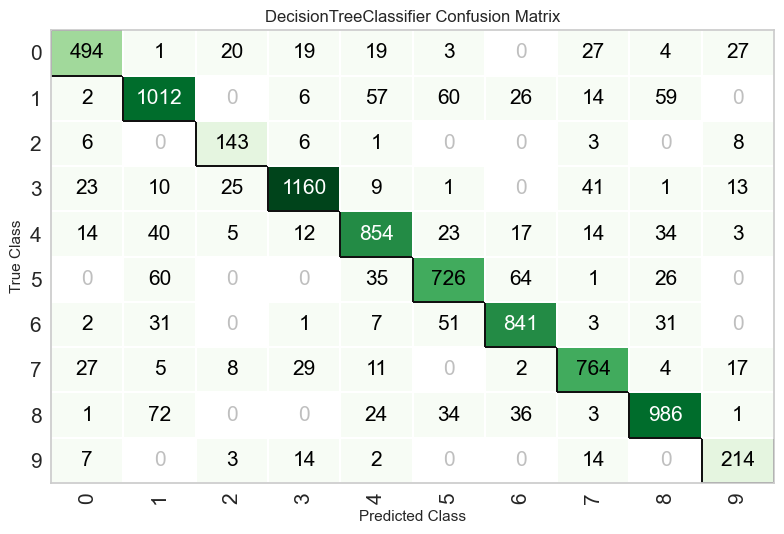

In [19]:
s.plot_model(dt_mdl, plot='confusion_matrix')

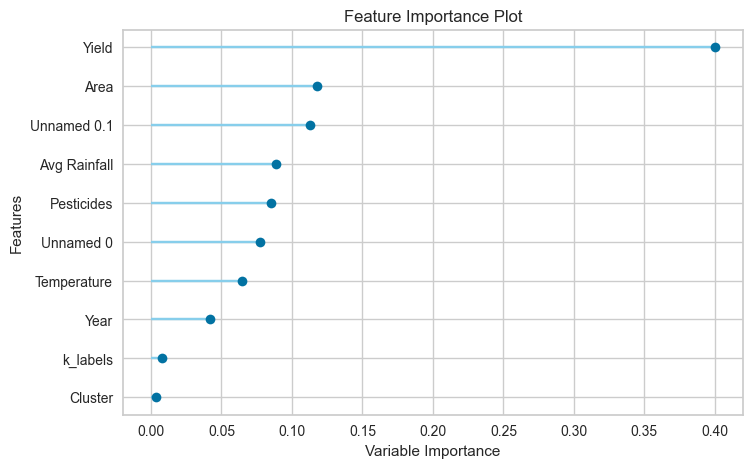

In [20]:
plot_model(dt_mdl, plot='feature')

# Classification Plots

### Confusion Matrix
Visualizes the performance of a classification model by showing the actual vs. predicted classifications.
```python
s.plot_model(dt_mdl, plot='confusion_matrix')
```

### AUC (Area Under the Curve)
Plots the ROC curve and calculates the area under it, which helps in evaluating the model's ability to distinguish between classes.
```python
s.plot_model(dt_mdl, plot='auc')
```

### Feature Importance
Displays the importance of each feature in the model.
```python
s.plot_model(dt_mdl, plot='feature')
```

### Learning Curve
Plots the training and validation scores over different training set sizes to show how the model learns over time.
```python
s.plot_model(dt_mdl, plot='learning')
```

### Validation Curve
Shows the model's performance over a range of hyperparameter values.
```python
s.plot_model(dt_mdl, plot='vc')
```

### Manifold Learning
Uses techniques like t-SNE or UMAP to visualize high-dimensional data in a lower-dimensional space.
```python
s.plot_model(dt_mdl, plot='manifold')
```

### Calibration Curve
Plots the predicted probabilities against the actual outcomes to assess the calibration of the model.
```python
s.plot_model(dt_mdl, plot='calibration')
```

### Lift Curve
Shows the lift of the model, which is the ratio of the results obtained with and without the model.
```python
s.plot_model(dt_mdl, plot='lift')
```

### Gain Chart
Visualizes the cumulative gain of the model.
```python
s.plot_model(dt_mdl, plot='gain')
```

### KS Statistic Plot
Plots the Kolmogorov-Smirnov statistic to evaluate the separation between the positive and negative classes.
```python
s.plot_model(dt_mdl, plot='ks')
```

### Decision Boundary
Visualizes the decision boundaries of the model.
```python
s.plot_model(dt_mdl, plot='boundary')
```